In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("movie_metadata.csv")

# facenumber_in_poster
df_genres = df['genres'].str.split('|')
df_faces = df['facenumber_in_poster']
max_faces = max(df_faces)
print(max_faces)
genres = []
# Zero faces
for i in df_genres:
    for j in i:
        if j not in genres:
            genres.append(j)

print(genres)
# jet = plt.get_cmap('jet')
# N = len(genres)
# plt.bar(range(N), genres.values(), align='center', color=jet(np.linspace(0, 1.0, N)))
# plt.xticks(range(N), genres.keys(), rotation=25)


43.0
['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller', 'Documentary', 'Romance', 'Animation', 'Comedy', 'Family', 'Musical', 'Mystery', 'Western', 'Drama', 'History', 'Sport', 'Crime', 'Horror', 'War', 'Biography', 'Music', 'Game-Show', 'Reality-TV', 'News', 'Short', 'Film-Noir']


{'Film-Noir': {0: 1, 1: 1, 2: 0, 4: 0}, 'Drama': {0: 1055, 1: 719, 2: 369, 3: 199, 4: 97, 5: 52, 6: 24, 7: 22, 8: 18, 9: 8, 10: 3, 43: 0, 12: 2, 13: 0, 14: 0, 15: 2, 11: 0, 19: 0, 31: 0}, 'Musical': {0: 55, 1: 30, 2: 20, 3: 7, 4: 3, 5: 2, 6: 1, 7: 3, 8: 0, 9: 1}, 'Adventure': {0: 449, 1: 205, 2: 104, 3: 76, 4: 44, 5: 9, 6: 10, 7: 2, 8: 7, 9: 0, 10: 0, 11: 0, 15: 0}, 'Documentary': {0: 82, 1: 22, 2: 5, 3: 5, 7: 0, 10: 0, 11: 0}, 'Reality-TV': {0: 0, 1: 0}, 'History': {0: 96, 1: 60, 2: 20, 3: 14, 4: 5, 6: 1, 7: 0, 8: 0, 10: 0, 12: 0, 14: 0}, 'Sci-Fi': {0: 344, 1: 123, 2: 56, 3: 37, 4: 25, 5: 8, 6: 9, 7: 2, 8: 2}, 'Sport': {0: 75, 1: 53, 2: 21, 3: 16, 4: 2, 5: 2, 6: 1, 7: 0, 8: 1, 9: 0, 11: 0}, 'Game-Show': {0: 0}, 'Biography': {0: 130, 1: 89, 2: 34, 3: 21, 4: 3, 5: 0, 6: 1, 7: 4, 8: 1}, 'News': {0: 2}, 'Comedy': {0: 608, 1: 454, 2: 328, 3: 162, 4: 96, 5: 69, 6: 50, 7: 31, 8: 26, 9: 13, 10: 7, 11: 2, 12: 2, 13: 1, 15: 3, 43: 0}, 'Music': {0: 96, 1: 41, 2: 26, 3: 15, 4: 9, 5: 4, 6: 4, 7: 2

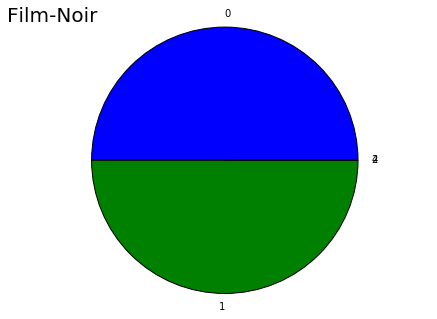

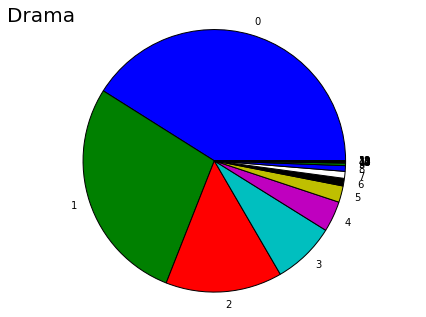

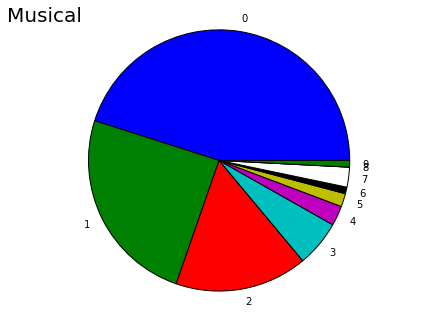

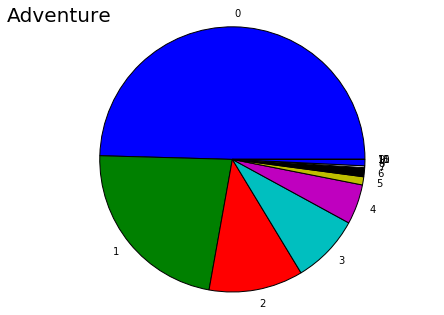

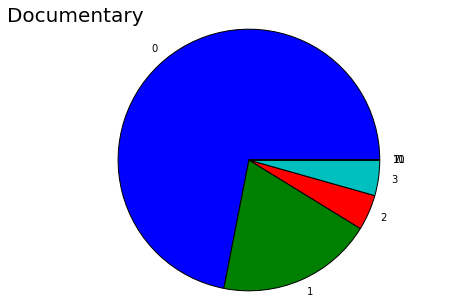

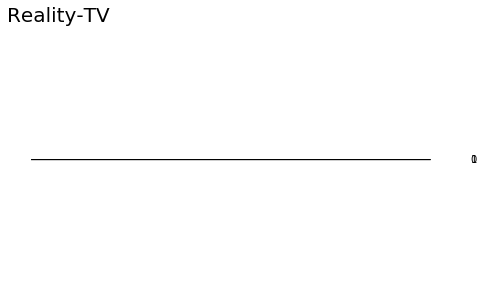

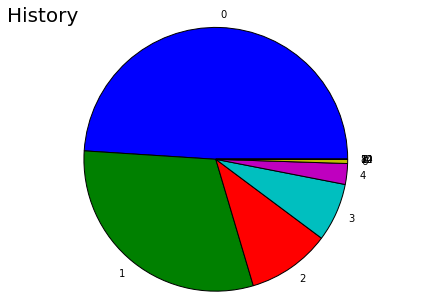

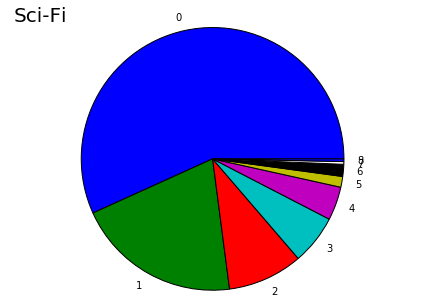

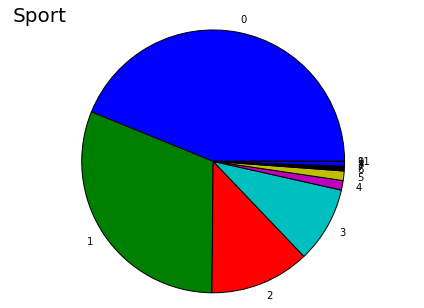

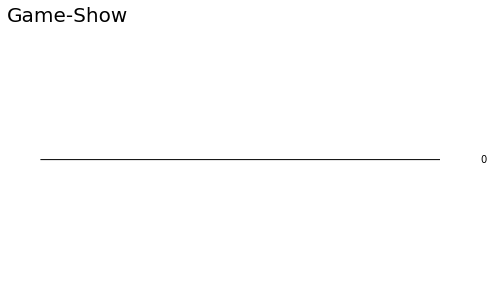

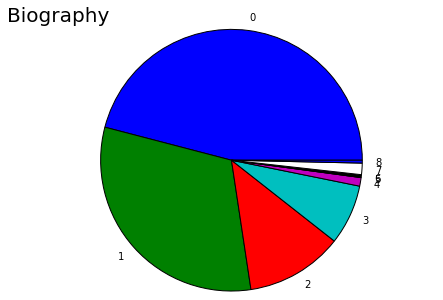

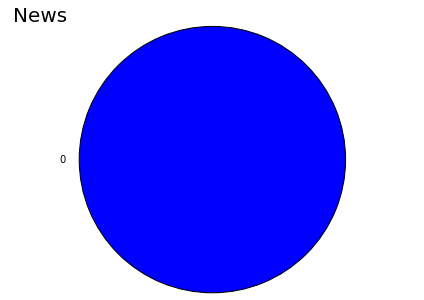

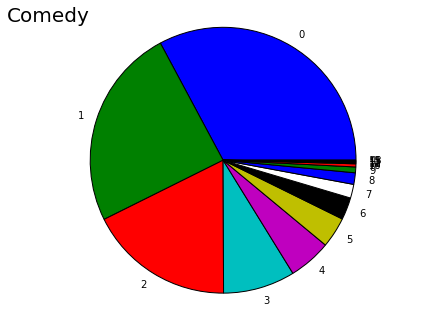

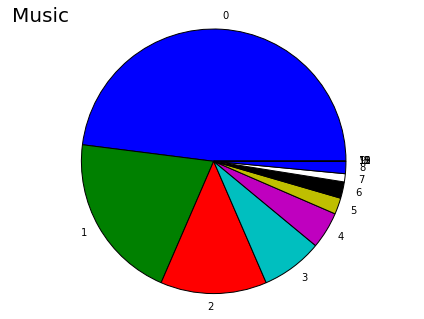

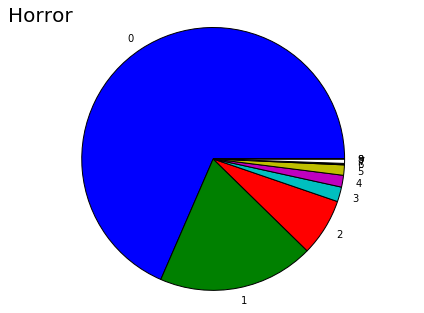

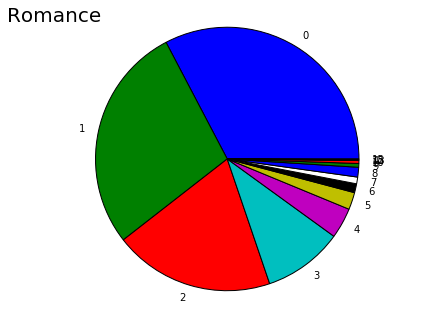

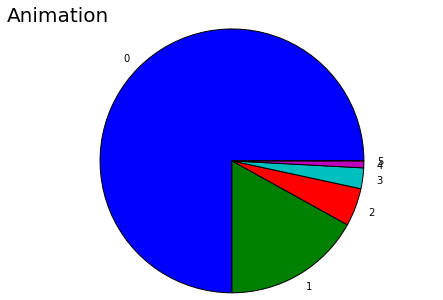

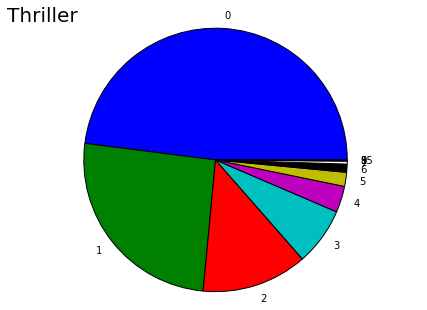

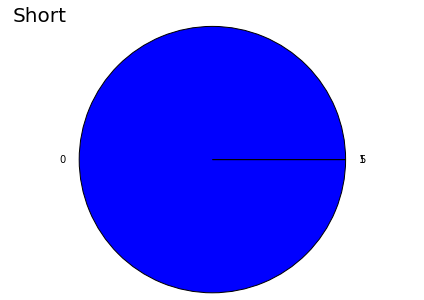

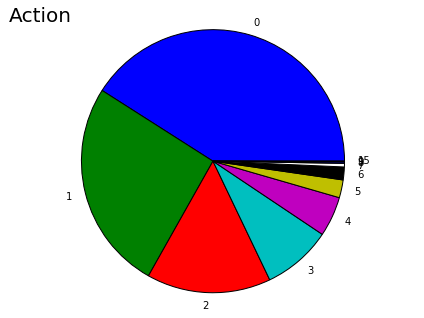

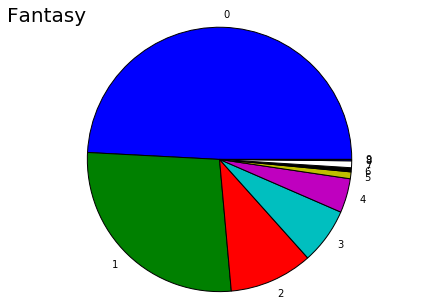

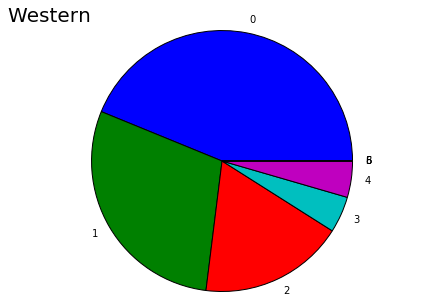

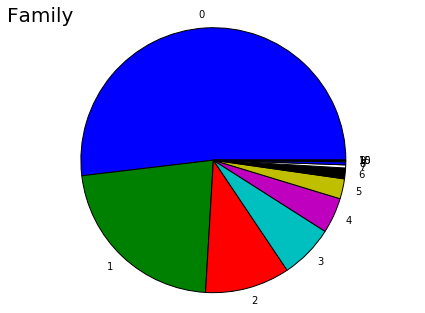

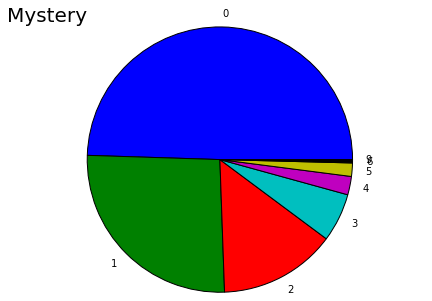

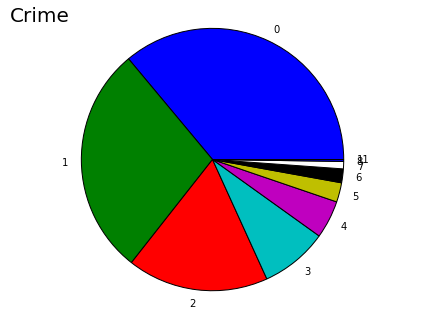

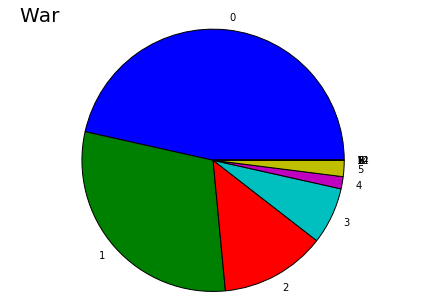

In [1]:
# Number of faces vs genre

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("movie_metadata.csv")

# facenumber_in_poster
df_genres = df['genres'].str.split('|')
df_combined = df[['genres','facenumber_in_poster']]
df_combined = df_combined[np.isfinite(df['facenumber_in_poster'])]
genres = {}

for i in df_genres:
    for j in i:
        if j not in genres:
            genres[j] = {}

for index, row in df_combined.iterrows():
    faces = int(row['facenumber_in_poster'])
    genres_list = row['genres'].split('|')
    for i in genres_list:
        if faces in genres[i]:
            genres[i][faces] = genres[i][faces] + 1
        else:
            genres[i][faces] = 0

print(genres)

%pylab inline

for genre in genres.keys():
    values_list = list(genres[genre].values())
    keys_list = list(genres[genre].keys())
    plt.pie(values_list, labels=keys_list)
    plt.axis('equal')
    plt.tight_layout()
    plt.title(genre, x=0.08, fontsize=20)
    plt.show()


C:\Users\Jobin\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Jobin\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


{0: 1233, 1: 678, 2: 403, 3: 237, 4: 128, 5: 46, 6: 45, 7: 31, 8: 26, 9: 9, 10: 6, 43: 1, 12: 2, 13: 1, 15: 3, 31: 1}


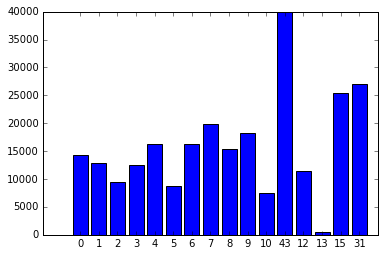

In [31]:
# Face number in poster vs FB Likes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("movie_metadata.csv")
df_combined = df[['facenumber_in_poster','movie_facebook_likes']]

# Cleaning data
df_combined = df_combined[(df_combined['movie_facebook_likes'] != 0)]
df_combined = df_combined[np.isfinite(df['facenumber_in_poster'])]
df_combined = df_combined[np.isfinite(df['movie_facebook_likes'])]


num_faces = {}
num_movies = {}
for index, row in df_combined.iterrows():
    faces = int(row['facenumber_in_poster'])
    likes = int(row['movie_facebook_likes'])
    if faces in num_faces:
        num_faces[faces] += likes
        num_movies[faces] += 1
    else:
        num_faces[faces] = likes
        num_movies[faces] = 1
        
print(num_movies)

for i in num_faces:
    num_faces[i] = num_faces[i]//num_movies[i]

plt.bar(range(len(num_faces)), num_faces.values(), align='center')
plt.xticks(range(len(num_faces)), list(num_faces.keys()))

plt.show()

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jobin\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


{'Animation': 143, 'Drama': 1486, 'Sci-Fi': 354, 'Game-Show': 1, 'Western': 52, 'History': 106, 'Reality-TV': 1, 'Comedy': 1041, 'Short': 4, 'Adventure': 522, 'Romance': 614, 'Fantasy': 367, 'Biography': 147, 'Crime': 490, 'Action': 616, 'Family': 314, 'Film-Noir': 2, 'Thriller': 748, 'News': 2, 'Documentary': 79, 'Music': 103, 'Musical': 74, 'Horror': 301, 'Mystery': 270, 'Sport': 83, 'War': 125}


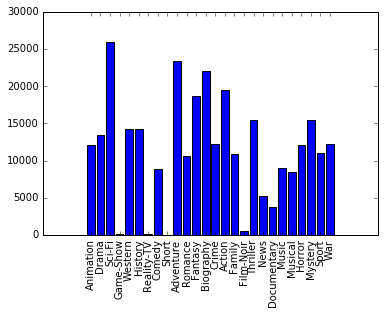

In [2]:
# Genre vs FB Likes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

df = pd.read_csv("movie_metadata.csv")
df_combined = df[['genres','movie_facebook_likes']]

# Cleaning data
df_combined = df_combined[(df_combined['movie_facebook_likes'] != 0)]
df_combined = df_combined[np.isfinite(df['movie_facebook_likes'])]

num_genres = {}
num_movies = {}
for index, row in df_combined.iterrows():
    genres_list = row['genres'].split('|')
    likes = int(row['movie_facebook_likes'])
    for i in genres_list:
        if i in num_genres:
            num_genres[i] += likes
            num_movies[i] += 1
        else:
            num_genres[i] = likes
            num_movies[i] = 1

print(num_movies)

for i in num_genres:
    num_genres[i] = num_genres[i]//num_movies[i]

plt.bar(range(len(num_genres)), num_genres.values(), align='center')
plt.xticks(range(len(num_genres)), list(num_genres.keys()), rotation='vertical')

plt.show()

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jobin\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


{nan: 251, 'GP': 2, 'Not Rated': 69, 'TV-G': 6, 'TV-MA': 13, 'X': 6, 'TV-Y': 1, 'TV-Y7': 1, 'Unrated': 40, 'TV-PG': 5, 'R': 1173, 'TV-14': 15, 'M': 2, 'PG-13': 791, 'Passed': 9, 'G': 72, 'Approved': 29, 'NC-17': 4, 'PG': 373}


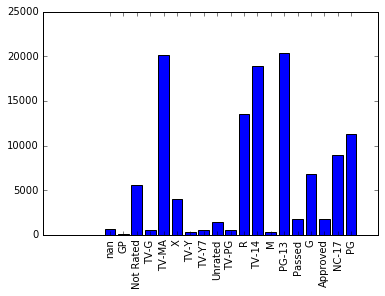

In [10]:
# Content rating vs FB Likes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

df = pd.read_csv("movie_metadata.csv")
df_combined = df[['content_rating','movie_facebook_likes']]

# Cleaning data

df_combined = df_combined[(df_combined['content_rating'] != '')]
df_combined = df_combined[(df_combined['movie_facebook_likes'] != 0)]
df_combined = df_combined[np.isfinite(df['movie_facebook_likes'])]

num_cr = {}
num_movies = {}
for index, row in df_combined.iterrows():
    content_rating = row['content_rating']
    likes = int(row['movie_facebook_likes'])
    if content_rating in num_cr:
        num_cr[content_rating] += likes
        num_movies[content_rating] += 1
    else:
        num_cr[content_rating] = likes
        num_movies[content_rating] = 1

print(num_movies)

for i in num_cr:
    num_cr[i] = num_cr[i]//num_movies[i]

plt.bar(range(len(num_cr)), num_cr.values(), align='center')
plt.xticks(range(len(num_cr)), list(num_cr.keys()), rotation='vertical')

plt.show()